<a href="https://colab.research.google.com/github/dookda/499-64/blob/main/proj_fai_urban/urban_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# dataset_path = '/content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo11'
dataset_path = '/content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8'

In [ ]:
# install yolo 11 from ultralytics
!pip install ultralytics

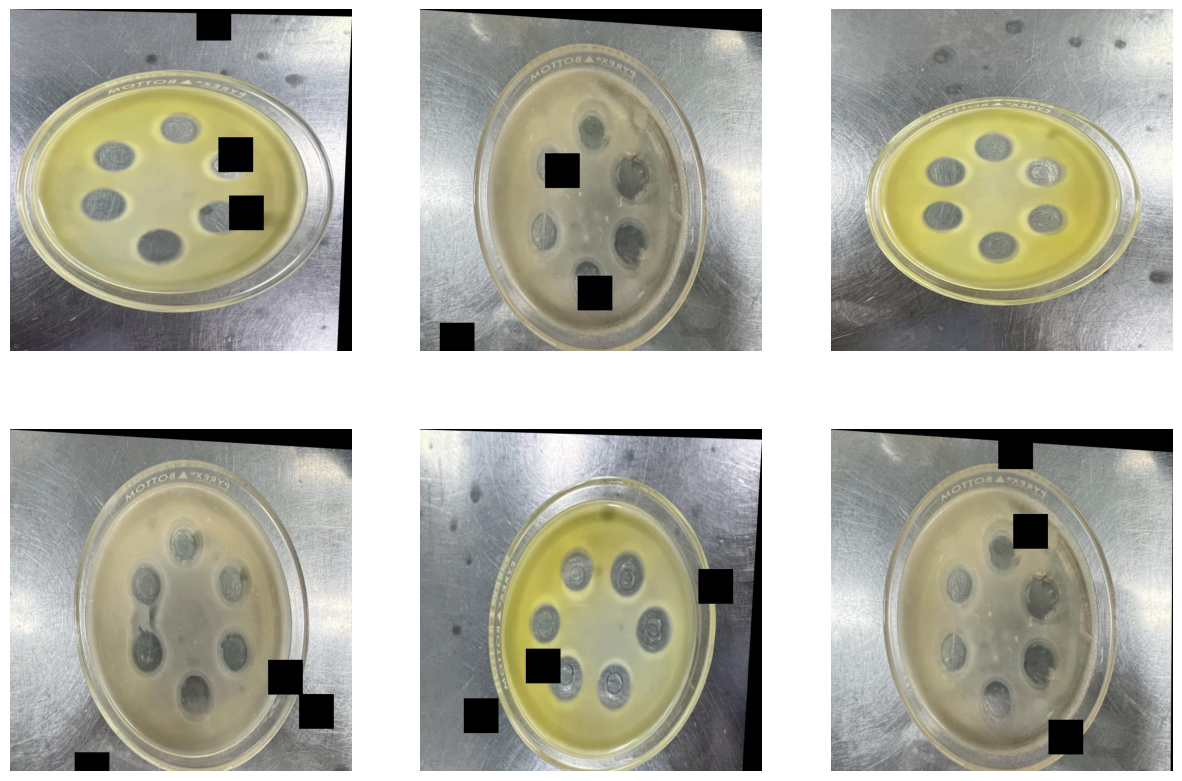

In [25]:
# prompt: show 2-3 image
import os
import random
import cv2
import matplotlib.pyplot as plt

# Select 2-3 random image files
validImagePath = os.path.join(dataset_path, 'train', 'images')
imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]
numImages = min(6, len(imageFiles))
random.shuffle(imageFiles)
selectedImage = imageFiles[:numImages]

# show 2x3 row col
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, imageFile in enumerate(selectedImage):
    image = cv2.imread(os.path.join(validImagePath, imageFile))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].imshow(image)
    axs[i].axis('off')
plt.show()

In [19]:
# load model
from ultralytics import YOLO
model = YOLO('yolo11m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 51.6MB/s]


In [26]:
yml_file = os.path.join(dataset_path, 'data.yaml')

In [27]:
# custom yolo model
result = model.train(
    data=yml_file,
    epochs=50,
    imgsz=640,
    batch=8,
    # optimizer='auto',
    # lr0=0.0001,
    # lrf=0.01,
    # dropout=0.25,
    # device='cpu',
    device=0,
    # seed=42
    name="yolov11-scpic"
)



Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11-scpic2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

train: Scanning /content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8/train/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:47<00:00,  1.05s/it]

train: New cache created: /content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 0.1±0.0 MB/s, size: 54.1 KB)


val: Scanning /content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

val: New cache created: /content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8/valid/labels.cache


Plotting labels to runs/detect/yolov11-scpic2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11-scpic2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.44G      3.781      6.462      3.398         34        640: 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.44G      3.356      6.055      3.154         44        640: 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]

                   all          4         24    0.00856      0.292     0.0142    0.00595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.44G      3.094      4.744      2.463         28        640: 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.46G      2.433      3.231      2.224         31        640: 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.51G      2.515      3.974      2.319         31        640: 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.55G      2.211      2.609      1.997         43        640: 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.62G      1.974       2.27      1.936         32        640: 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all          4         24      0.005       0.25    0.00319    0.00108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.68G      1.777      1.959      1.764         50        640: 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.79G      1.647      1.763      1.736         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.92G      1.518      1.572      1.686         73        640: 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.89it/s]

                   all          4         24     0.0168      0.125    0.00737    0.00282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.98G      1.694      1.487      1.728         60        640: 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          4         24          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.11G       1.52      1.498      1.655         54        640: 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all          4         24     0.0519      0.667     0.0616     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.42G      1.364      1.256      1.528         32        640: 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          4         24      0.407      0.372      0.339       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.51G      1.432      1.233        1.6         62        640: 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all          4         24      0.409      0.333       0.27      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.57G      1.376      1.031      1.601         52        640: 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]

                   all          4         24      0.409      0.333       0.27      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.64G      1.346      1.066      1.489         42        640: 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all          4         24      0.754      0.384       0.51      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.71G      1.319      1.053       1.47         50        640: 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          4         24      0.959       0.75      0.835      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       6.8G      1.317      1.086       1.54         50        640: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          4         24      0.442      0.417      0.378      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.92G      1.239     0.9248       1.46         42        640: 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          4         24      0.442      0.417      0.378      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.04G      1.197      0.874      1.402         41        640: 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          4         24      0.733      0.125      0.127     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.16G      1.153     0.8276      1.305         48        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          4         24     0.0609     0.0417     0.0156    0.00624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.24G      1.273     0.8917       1.49         45        640: 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all          4         24      0.257     0.0833     0.0805     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       7.4G      1.284      0.844      1.429         38        640: 100%|██████████| 6/6 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all          4         24      0.257     0.0833     0.0805     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.27G      1.162     0.7547      1.343         69        640: 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all          4         24      0.714      0.708      0.742      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.27G       1.19     0.8032      1.451         27        640: 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          4         24      0.953      0.841      0.932      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.27G      1.089     0.7276      1.318         64        640: 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all          4         24      0.881      0.708      0.738      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.27G      1.045     0.7286      1.352         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]

                   all          4         24      0.881      0.708      0.738      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.27G      1.104     0.7245       1.34         62        640: 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all          4         24          1      0.994      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.27G      1.006      0.699      1.349         33        640: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          4         24      0.991      0.958      0.988      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.29G      1.007     0.6791      1.281         51        640: 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          4         24          1      0.822      0.961      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.42G      1.056      0.692      1.373         21        640: 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all          4         24          1      0.822      0.961      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.54G       1.01     0.6798      1.276         74        640: 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          4         24      0.981      0.833      0.966      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.64G      1.024     0.6453      1.264         64        640: 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all          4         24      0.997          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.74G      0.949     0.5996      1.217         41        640: 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all          4         24      0.995          1      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.9G     0.9032     0.5983      1.191         62        640: 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         24      0.995          1      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.99G      1.005     0.6154      1.307         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all          4         24      0.998          1      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.12G     0.9765     0.5934       1.23         49        640: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]

                   all          4         24      0.995          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       6.2G     0.9695     0.5707      1.214         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]

                   all          4         24      0.996          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.34G     0.8985     0.5671      1.229         45        640: 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all          4         24      0.996          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.46G     0.8826     0.5544      1.146         61        640: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          4         24      0.998          1      0.995      0.827


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.56G     0.8677     0.5649      1.273         30        640: 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          4         24      0.997          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.66G     0.9476     0.6418      1.375         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          4         24      0.997          1      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       6.8G     0.9077     0.5441      1.286         30        640: 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all          4         24      0.997          1      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.92G     0.8939     0.5661      1.348         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all          4         24      0.997          1      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.04G     0.8715     0.5361      1.305         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          4         24      0.997          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.12G     0.8549     0.5175       1.31         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all          4         24      0.997          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.26G     0.8241     0.5057      1.183         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         24      0.997          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.38G     0.8459     0.5198      1.326         30        640: 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          4         24      0.997          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.29G     0.8284     0.5157      1.302         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all          4         24      0.997          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.29G     0.8134     0.5314      1.271         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all          4         24      0.998          1      0.995       0.82



50 epochs completed in 0.044 hours.
Optimizer stripped from runs/detect/yolov11-scpic2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/yolov11-scpic2/weights/best.pt, 40.5MB

Validating runs/detect/yolov11-scpic2/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]


                   all          4         24      0.998          1      0.995      0.826
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/yolov11-scpic2



image 1/1 /content/drive/MyDrive/_DATASET/sc_pic/scpic_yolo8/test/images/LINE_ALBUM_Betrago-Lab-dimension-dataset_250606_19_jpg.rf.7b0fa731f616a7a105f980ca7c36cbcf.jpg: 640x640 6 circles, 36.9ms
Speed: 2.6ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


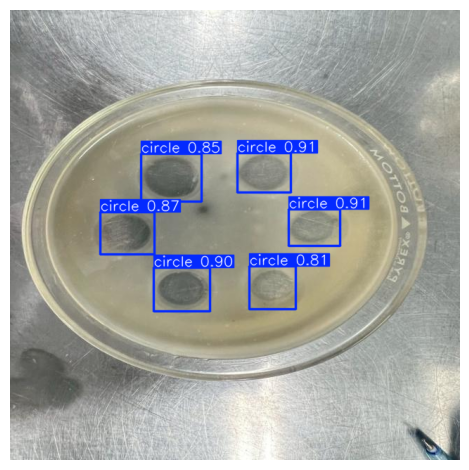

In [32]:
bestModelPath = '/content/runs/detect/yolov11-scpic2/weights/best.pt'
bestModel = YOLO(bestModelPath)

validImagePath = os.path.join(dataset_path, 'test', 'images')
imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages)]

for i in imageFiles:
  imagePath = os.path.join(validImagePath, i)
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  plt.imshow(annotatedImageRGB)
  plt.axis('off')
  plt.tight_layout()
  plt.show()